In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import pytry
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
n_iti = 20 #Number of experiment iterations/number of data files
#data3 = pd.DataFrame(pytry.read('theta15_batch'))
#data3

In [3]:
data = pd.DataFrame(pytry.read('theta15_batch'))
data = data.reset_index(drop=True)
list = [col for col in data if col.startswith('output')]
for i in list:
    data2=data[i].apply(pd.Series)
    data[i]=data2.iloc[:,-1]

C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexes\range.py:465: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  return self._int64index.union(other)
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexes\api.py:69: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  index = _union_indexes(indexes, sort=sort)


In [4]:
data

,classify_aim,classify_test,classify_train,len_train,n_dims,n_epoch,output_aim000000,output_aim000001,output_aim000002,output_aim000003,...,output_train039992,output_train039993,output_train039994,output_train039995,output_train039996,output_train039997,output_train039998,output_train039999,p_seed,seed
0,0.525,0.3020,0.853100,500,2,2,[-0.03678271],[-0.03330736],[-0.0249887],[-0.01869108],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,0.294,0.3885,0.804300,500,2,2,[0.03169563],[0.07251411],[0.11364551],[0.15823389],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
2,0.272,0.2420,0.879150,500,2,2,[0.43278471],[0.42334521],[0.38135521],[0.28116193],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
3,0.638,0.6940,0.865450,500,2,2,[0.4283354],[0.42936808],[0.43017685],[0.42647466],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3
4,0.608,0.3175,0.906200,500,2,2,[-0.44300502],[-0.59044088],[-0.68997068],[-0.78119305],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4
5,0.565,0.2825,0.862500,500,2,2,[0.76798969],[0.74858831],[0.74973397],[0.74669559],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5
6,0.485,0.3675,0.894750,500,2,2,[0.17539283],[0.18753508],[0.10016202],[0.03899823],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6
7,0.582,0.1605,0.831950,500,2,2,[0.10777846],[0.0818646],[0.08025842],[0.07971365],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,7
8,0.362,0.2820,0.840200,500,2,2,[-0.60297085],[-0.60278706],[-0.61288204],[-0.62004856],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,8
9,0.484,0.1810,0.833500,500,2,2,[0.86994844],[0.86404974],[0.86428517],[0.86284844],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,9


In [5]:
list = [col for col in data if col.startswith('output_train')]
print(len(list))
list = [col for col in data if col.startswith('output_test')]
print(len(list))
list = [col for col in data if col.startswith('output_aim')]
print(len(list))

40000
2000
1000


In [6]:
batches2 = pd.DataFrame(data[:20]) #20,000
batches3 = pd.DataFrame(data[20:40]) #30,000
batches4 = pd.DataFrame(data[40:60]) #40,000

Text(0.5,1,'2,000 seconds training')

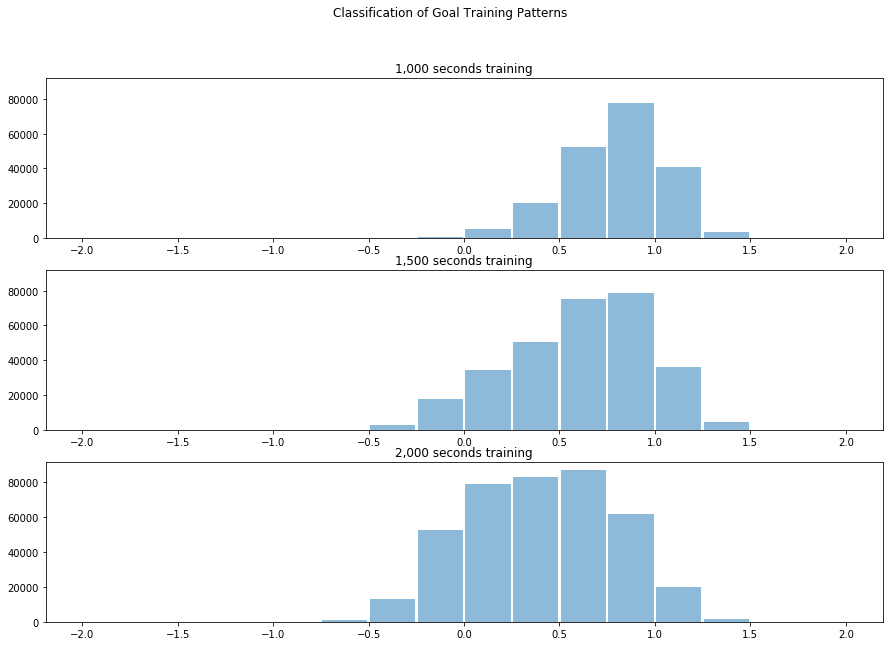

In [7]:
goal_training2 = pd.DataFrame({'goal_training': pd.concat([eval('batches2.output_train%06d' % i) for i in range(10000)])})
goal_training3 = pd.DataFrame({'goal_training': pd.concat([eval('batches3.output_train%06d' % i) for i in range(15000)])})
goal_training4 = pd.DataFrame({'goal_training': pd.concat([eval('batches4.output_train%06d' % i) for i in range(20000)])})
                           
goal_train2 = []
for i in range(len(goal_training2)):
    a = goal_training2.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    goal_train2.append(a)
goal_train2 = np.asarray(goal_train2)

goal_train3 = []
for i in range(len(goal_training3)):
    a = goal_training3.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    goal_train3.append(a)
goal_train3 = np.asarray(goal_train3)

goal_train4 = []
for i in range(len(goal_training4)):
    a = goal_training4.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    goal_train4.append(a)
goal_train4 = np.asarray(goal_train4)
                                

     
bins=np.arange(-2, 2 + 0.25, 0.25)

f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey=True, figsize=(15, 10))
f.suptitle('Classification of Goal Training Patterns')
ax1.hist(goal_train2, bins=bins, rwidth=0.95, alpha=0.5, label='1,000 seconds training')
ax1.set_title('1,000 seconds training')
ax2.hist(goal_train3, bins=bins, rwidth=0.95, alpha=0.5, label='1,500 seconds training')
ax2.set_title('1,500 seconds training')
ax3.hist(goal_train4, bins=bins, rwidth=0.95, alpha=0.5, label='2,000 seconds training')
ax3.set_title('2,000 seconds training')

Text(0.5,1,'2,000 seconds training')

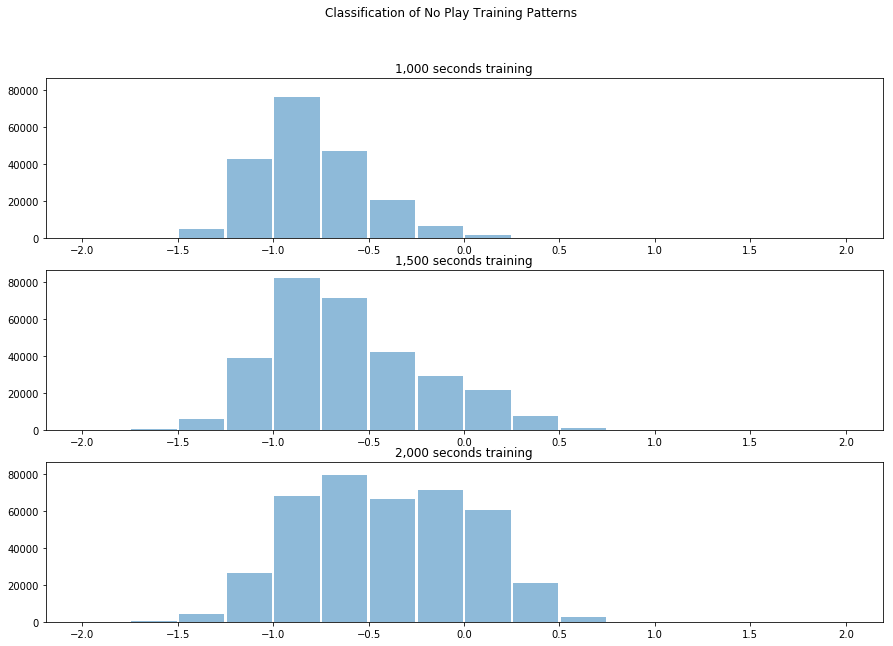

In [8]:
noplay_training2 = pd.DataFrame({'noplay_training': pd.concat([eval('batches2.output_train%06d' % i) for i in range(10000,20000)])})
noplay_training3 = pd.DataFrame({'noplay_training': pd.concat([eval('batches3.output_train%06d' % i) for i in range(15000,30000)])})
noplay_training4 = pd.DataFrame({'noplay_training': pd.concat([eval('batches4.output_train%06d' % i) for i in range(20000,40000)])})
                           
noplay_train2 = []
for i in range(len(noplay_training2)):
    a = noplay_training2.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    noplay_train2.append(a)
noplay_train2 = np.asarray(noplay_train2)

noplay_train3 = []
for i in range(len(noplay_training3)):
    a = noplay_training3.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    noplay_train3.append(a)
noplay_train3 = np.asarray(noplay_train3)

noplay_train4 = []
for i in range(len(noplay_training4)):
    a = noplay_training4.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    noplay_train4.append(a)
noplay_train4 = np.asarray(noplay_train4)
                                

f, (ax1,ax2,ax3) = plt.subplots(3, 1, sharey=True, figsize=(15, 10))
f.suptitle('Classification of No Play Training Patterns')
ax1.hist(noplay_train2, bins=bins, rwidth=0.95, alpha=0.5, label='1,000 seconds training')
ax1.set_title('1,000 seconds training')
ax2.hist(noplay_train3, bins=bins, rwidth=0.95, alpha=0.5, label='1,500 seconds training')
ax2.set_title('1,500 seconds training')
ax3.hist(noplay_train4, bins=bins, rwidth=0.95, alpha=0.5, label='2,000 seconds training')
ax3.set_title('2,000 seconds training')

Text(0.5,1,'2,000 seconds training')

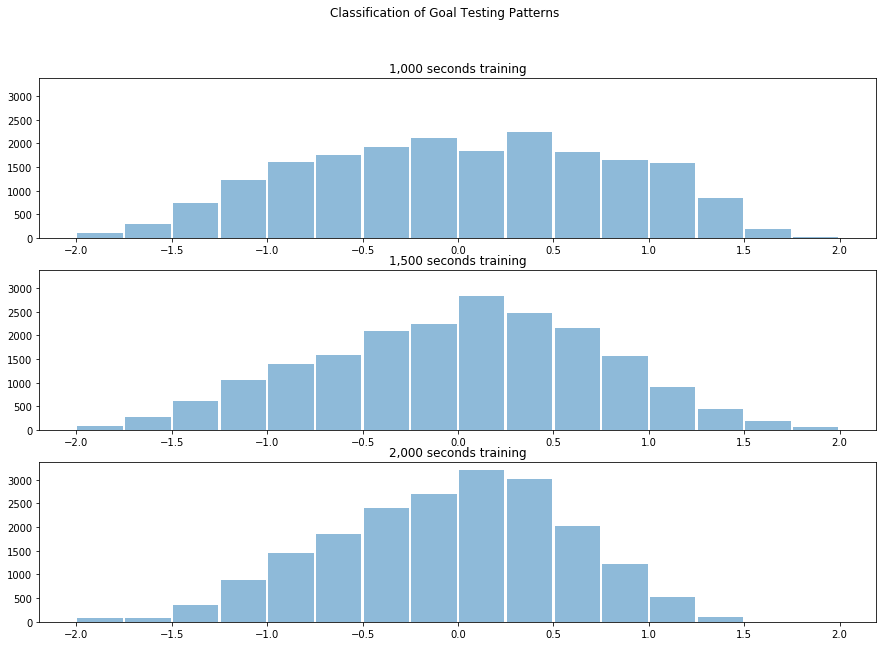

In [9]:
goal_testing2 = pd.DataFrame({'goal_testing': pd.concat([eval('batches2.output_test%06d' % i) for i in range(1000)])})
goal_testing3 = pd.DataFrame({'goal_testing': pd.concat([eval('batches3.output_test%06d' % i) for i in range(1000)])})
goal_testing4 = pd.DataFrame({'goal_testing': pd.concat([eval('batches4.output_test%06d' % i) for i in range(1000)])})

goal_test2 = []
for i in range(len(goal_testing2)):
    a = goal_testing2.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    goal_test2.append(a)
goal_test2 = np.asarray(goal_test2)
                                
goal_test3 = []
for i in range(len(goal_testing3)):
    a = goal_testing3.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    goal_test3.append(a)
goal_test3 = np.asarray(goal_test3)

goal_test4 = []
for i in range(len(goal_testing4)):
    a = goal_testing4.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    goal_test4.append(a)
goal_test4 = np.asarray(goal_test4)

f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey=True, figsize=(15, 10))
f.suptitle('Classification of Goal Testing Patterns')
ax1.hist(goal_test2, bins=bins, rwidth=0.95, alpha=0.5, label='1,000 seconds training')
ax1.set_title('1,000 seconds training')
ax2.hist(goal_test3, bins=bins, rwidth=0.95, alpha=0.5, label='1,500 seconds training')
ax2.set_title('1,500 seconds training')
ax3.hist(goal_test4, bins=bins, rwidth=0.95, alpha=0.5, label='2,000 seconds training')
ax3.set_title('2,000 seconds training')

Text(0.5,1,'2,000 seconds training')

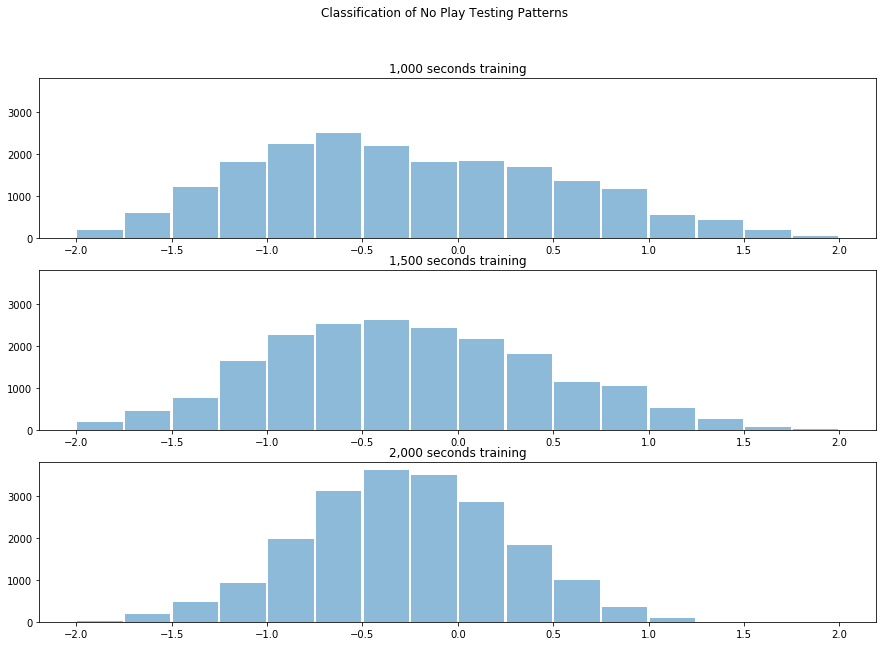

In [10]:
noplay_testing2 = pd.DataFrame({'noplay_testing': pd.concat([eval('batches2.output_test%06d' % i) for i in range(1000,2000)])})
noplay_testing3 = pd.DataFrame({'noplay_testing': pd.concat([eval('batches3.output_test%06d' % i) for i in range(1000,2000)])})
noplay_testing4 = pd.DataFrame({'noplay_testing': pd.concat([eval('batches4.output_test%06d' % i) for i in range(1000,2000)])})

noplay_test2 = []
for i in range(len(noplay_testing2)):
    a = noplay_testing2.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    noplay_test2.append(a)
noplay_test2 = np.asarray(noplay_test2)
                                
noplay_test3 = []
for i in range(len(noplay_testing3)):
    a = noplay_testing3.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    noplay_test3.append(a)
noplay_test3 = np.asarray(noplay_test3)

noplay_test4 = []
for i in range(len(noplay_testing4)):
    a = noplay_testing4.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    noplay_test4.append(a)
noplay_test4 = np.asarray(noplay_test4)

f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey=True, figsize=(15, 10))
f.suptitle('Classification of No Play Testing Patterns')
ax1.hist(noplay_test2, bins=bins, rwidth=0.95, alpha=0.5, label='1,000 seconds training')
ax1.set_title('1,000 seconds training')
ax2.hist(noplay_test3, bins=bins, rwidth=0.95, alpha=0.5, label='1,500 seconds training')
ax2.set_title('1,500 seconds training')
ax3.hist(noplay_test4, bins=bins, rwidth=0.95, alpha=0.5, label='2,000 seconds training')
ax3.set_title('2,000 seconds training')

Text(0.5,1,'2,000 seconds training')

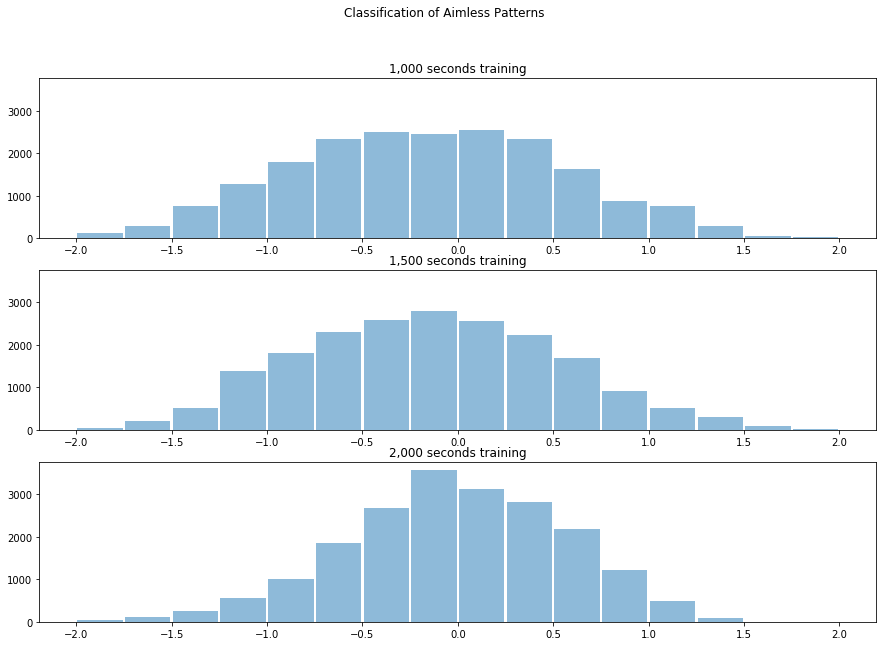

In [11]:
aimless2 = pd.DataFrame({'aimless_testing': pd.concat([eval('batches2.output_aim%06d' % i) for i in range (1000)])})
aimless3 = pd.DataFrame({'aimless_testing': pd.concat([eval('batches3.output_aim%06d' % i) for i in range (1000)])})
aimless4 = pd.DataFrame({'aimless_testing': pd.concat([eval('batches4.output_aim%06d' % i) for i in range (1000)])})

aim_test2 = []
for i in range(len(aimless2)):
    a = aimless2.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    aim_test2.append(a)
aim_test2 = np.asarray(aim_test2)

aim_test3 = []
for i in range(len(aimless3)):
    a = aimless3.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    aim_test3.append(a)
aim_test3 = np.asarray(aim_test3)

aim_test4 = []
for i in range(len(aimless4)):
    a = aimless4.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    aim_test4.append(a)
aim_test4 = np.asarray(aim_test4)

f, (ax1,ax2,ax3) = plt.subplots(3, 1, sharey=True, figsize=(15, 10))
f.suptitle('Classification of Aimless Patterns')
ax1.hist(aim_test2, bins=bins, rwidth=0.95, alpha=0.5, label='1,000 seconds training')
ax1.set_title('1,000 seconds training')
ax2.hist(aim_test3, bins=bins, rwidth=0.95, alpha=0.5, label='1,500 seconds training')
ax2.set_title('1,500 seconds training')
ax3.hist(aim_test4, bins=bins, rwidth=0.95, alpha=0.5, label='2,000 seconds training')
ax3.set_title('2,000 seconds training')

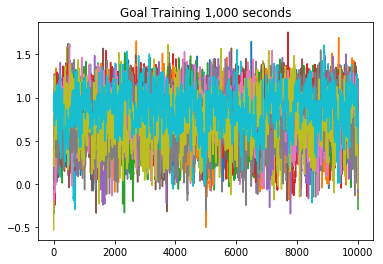

In [12]:
x = range(10000)
plt.figure()
for i in range(n_iti):
    #plt.figure()
    plt.title('Goal Training 1,000 seconds') #%d' % i) 
    plt.plot(x,goal_training2[i::n_iti])

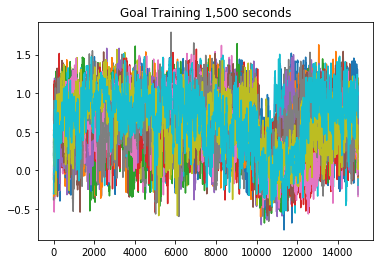

In [13]:
x = range(15000)
plt.figure()
for i in range(n_iti):
    #plt.figure()
    plt.title('Goal Training 1,500 seconds') #%d' % i) 
    plt.plot(x,goal_training3[i::n_iti])

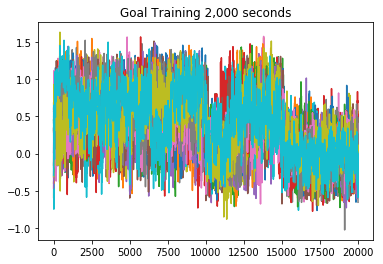

In [14]:
x = range(20000)
plt.figure()
for i in range(n_iti):
    #plt.figure()
    plt.title('Goal Training 2,000 seconds') #%d' % i) 
    plt.plot(x,goal_training4[i::n_iti])

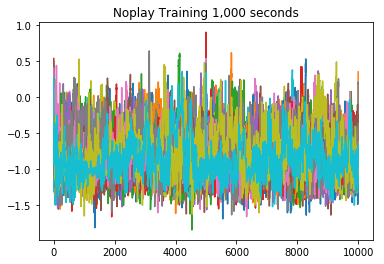

In [15]:
x = range(10000)
plt.figure()
for i in range(n_iti):
    #plt.figure()
    plt.title('Noplay Training 1,000 seconds')# %d' % i) 
    plt.plot(x,noplay_training2[i::n_iti])

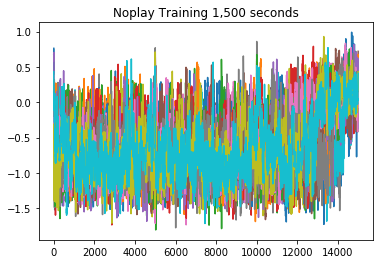

In [16]:
x = range(15000)
plt.figure()
for i in range(n_iti):
    #plt.figure()
    plt.title('Noplay Training 1,500 seconds')# %d' % i) 
    plt.plot(x,noplay_training3[i::n_iti])

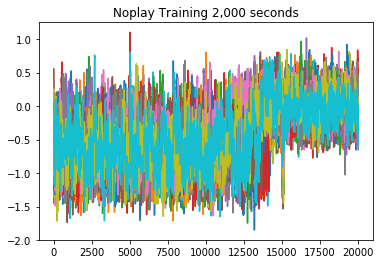

In [17]:
x = range(20000)
plt.figure()
for i in range(n_iti):
    #plt.figure()
    plt.title('Noplay Training 2,000 seconds')# %d' % i) 
    plt.plot(x,noplay_training4[i::n_iti])

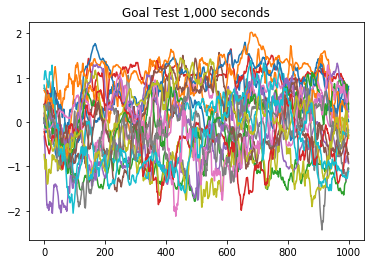

In [18]:
x = range(1000)
plt.figure()
for i in range(n_iti):
    #plt.figure()
    plt.title('Goal Test 1,000 seconds')# %d' % i) 
    plt.plot(x,goal_test2[i::n_iti])

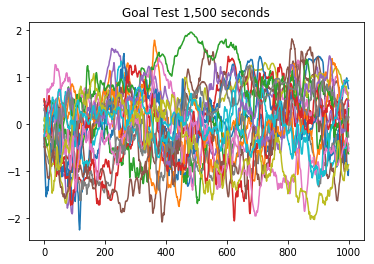

In [19]:
x = range(1000)
plt.figure()
for i in range(n_iti):
    #plt.figure()
    plt.title('Goal Test 1,500 seconds')# %d' % i) 
    plt.plot(x,goal_test3[i::n_iti])

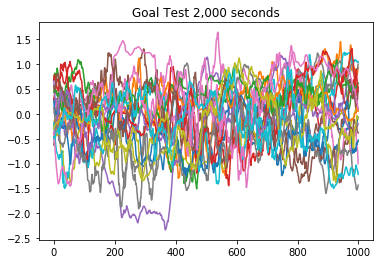

In [20]:
x = range(1000)
plt.figure()
for i in range(n_iti):
    #plt.figure()
    plt.title('Goal Test 2,000 seconds')# %d' % i) 
    plt.plot(x,goal_test4[i::n_iti])

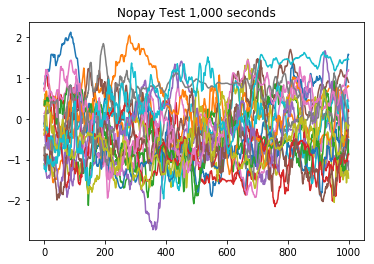

In [21]:
x = range(1000)
plt.figure()
for i in range(n_iti):
    #plt.figure()
    plt.title('Nopay Test 1,000 seconds')# %d' % i) 
    plt.plot(x,noplay_test2[i::n_iti])

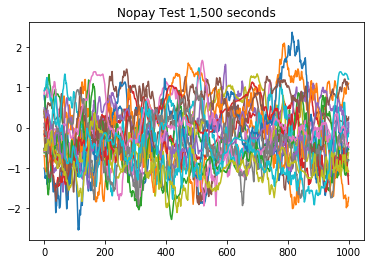

In [22]:
x = range(1000)
plt.figure()
for i in range(n_iti):
    #plt.figure()
    plt.title('Nopay Test 1,500 seconds')# %d' % i) 
    plt.plot(x,noplay_test3[i::n_iti])

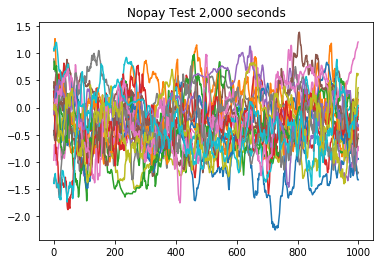

In [23]:
x = range(1000)
plt.figure()
for i in range(n_iti):
    #plt.figure()
    plt.title('Nopay Test 2,000 seconds')# %d' % i) 
    plt.plot(x,noplay_test4[i::n_iti])

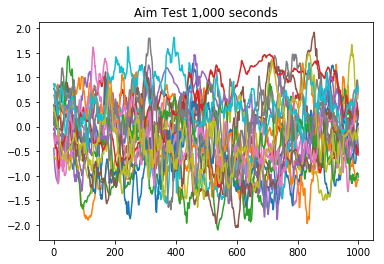

In [24]:
x = range(1000)
plt.figure()
for i in range(n_iti):
    #plt.figure()
    plt.title('Aim Test 1,000 seconds')# %d' % i) 
    plt.plot(x,aim_test2[i::n_iti])

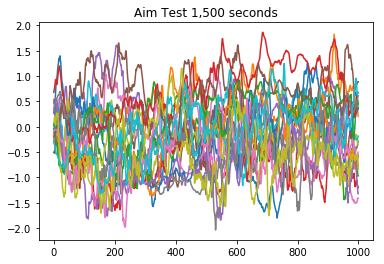

In [25]:
x = range(1000)
plt.figure()
for i in range(n_iti):
    #plt.figure()
    plt.title('Aim Test 1,500 seconds')# %d' % i) 
    plt.plot(x,aim_test3[i::n_iti])

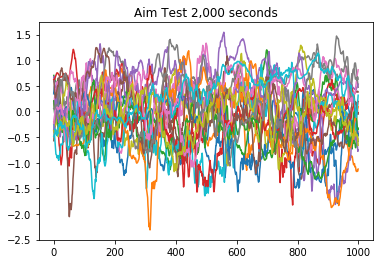

In [26]:
x = range(1000)
plt.figure()
for i in range(n_iti):
    #plt.figure()
    plt.title('Aim Test 2,000 seconds')# %d' % i) 
    plt.plot(x,aim_test4[i::n_iti])

# Report Average Output Every Second

Text(0.5,1,'2,000 seconds training')

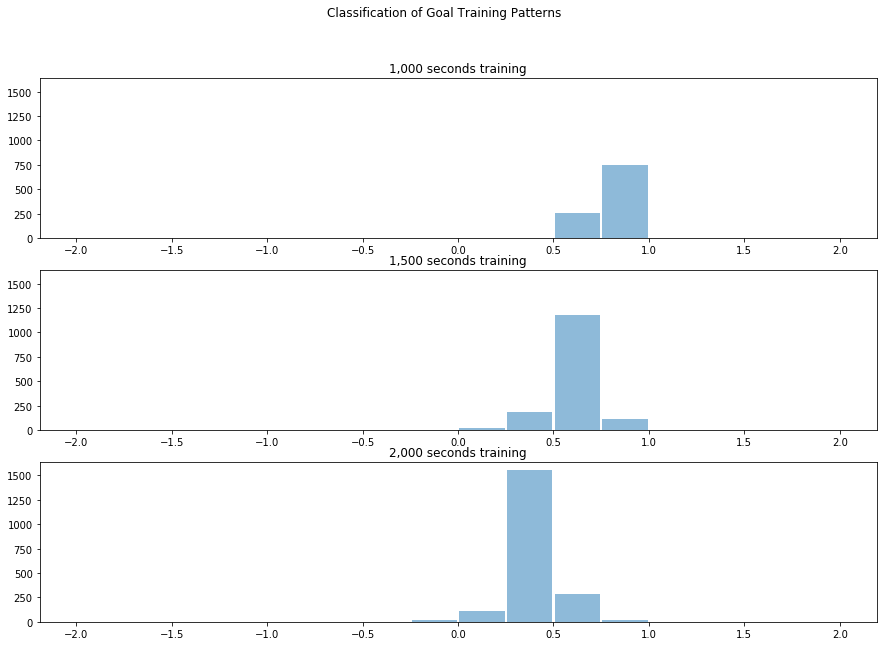

In [27]:
goal_training2=goal_training2.sort_index()
goal_training3=goal_training3.sort_index()
goal_training4=goal_training4.sort_index()

goaltrain_means2 = np.mean(goal_training2.values.reshape(-1, 200), axis=1) #200000/1000=200 so ave every 200 values
goaltrain_means3 = np.mean(goal_training3.values.reshape(-1, 200), axis=1) #300000/1500=200 so ave every 200 values
goaltrain_means4 = np.mean(goal_training4.values.reshape(-1, 200), axis=1) #400000/2000=200 so ave every 200 values

f, (ax1,ax2,ax3) = plt.subplots(3, 1, sharey=True, figsize=(15, 10))
f.suptitle('Classification of Goal Training Patterns')
ax1.hist(np.hstack(goaltrain_means2), bins=bins, rwidth=0.95, alpha=0.5, label='1,000 seconds training')
ax1.set_title('1,000 seconds training')
ax2.hist(np.hstack(goaltrain_means3), bins=bins, rwidth=0.95, alpha=0.5, label='1,500 seconds training')
ax2.set_title('1,500 seconds training')
ax3.hist(np.hstack(goaltrain_means4), bins=bins, rwidth=0.95, alpha=0.5, label='2,000 seconds training')
ax3.set_title('2,000 seconds training')

Text(0.5,1,'2,000 seconds training')

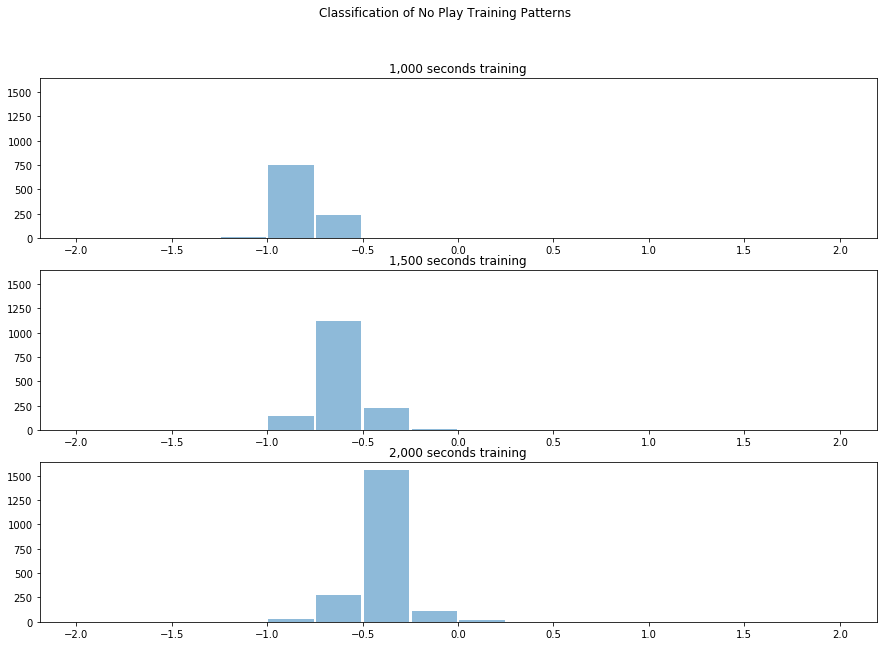

In [28]:
noplay_training2=noplay_training2.sort_index()
noplay_training3=noplay_training3.sort_index()
noplay_training4=noplay_training4.sort_index()

noplaytrain_means2 = np.mean(noplay_training2.values.reshape(-1, 200), axis=1) 
noplaytrain_means3 = np.mean(noplay_training3.values.reshape(-1, 200), axis=1) 
noplaytrain_means4 = np.mean(noplay_training4.values.reshape(-1, 200), axis=1) 

f, (ax1,ax2,ax3) = plt.subplots(3, 1, sharey=True, figsize=(15, 10))
f.suptitle('Classification of No Play Training Patterns')
ax1.hist(np.hstack(noplaytrain_means2), bins=bins, rwidth=0.95, alpha=0.5, label='1,000 seconds training')
ax1.set_title('1,000 seconds training')
ax2.hist(np.hstack(noplaytrain_means3), bins=bins, rwidth=0.95, alpha=0.5, label='1,500 seconds training')
ax2.set_title('1,500 seconds training')
ax3.hist(np.hstack(noplaytrain_means4), bins=bins, rwidth=0.95, alpha=0.5, label='2,000 seconds training')
ax3.set_title('2,000 seconds training')


Text(0.5,1,'2,000 seconds testing')

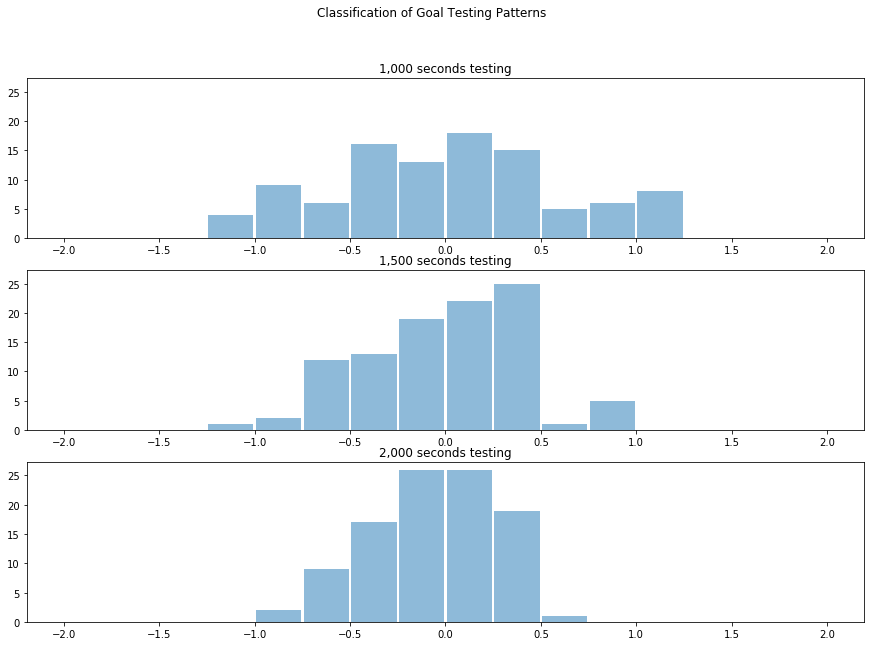

In [29]:
goal_testing2=goal_testing2.sort_index()
goal_testing3=goal_testing3.sort_index()
goal_testing4=goal_testing4.sort_index()

goaltest_means2 = np.mean(goal_testing2.values.reshape(-1, 200), axis=1) #20000/1000=200 so ave every 200 values
goaltest_means3 = np.mean(goal_testing3.values.reshape(-1, 200), axis=1) #20000/1000=200 so ave every 200 values
goaltest_means4 = np.mean(goal_testing4.values.reshape(-1, 200), axis=1) #20000/1000=200 so ave every 200 values

f, (ax1,ax2,ax3) = plt.subplots(3,1, sharey=True, figsize=(15, 10))
f.suptitle('Classification of Goal Testing Patterns')
ax1.hist(np.hstack(goaltest_means2), bins=bins, rwidth=0.95, alpha=0.5, label='1,000 seconds testing')
ax1.set_title('1,000 seconds testing')
ax2.hist(np.hstack(goaltest_means3), bins=bins, rwidth=0.95, alpha=0.5, label='1,500 seconds testing')
ax2.set_title('1,500 seconds testing')
ax3.hist(np.hstack(goaltest_means4), bins=bins, rwidth=0.95, alpha=0.5, label='2,000 seconds testing')
ax3.set_title('2,000 seconds testing')

Text(0.5,1,'2,000 seconds testing')

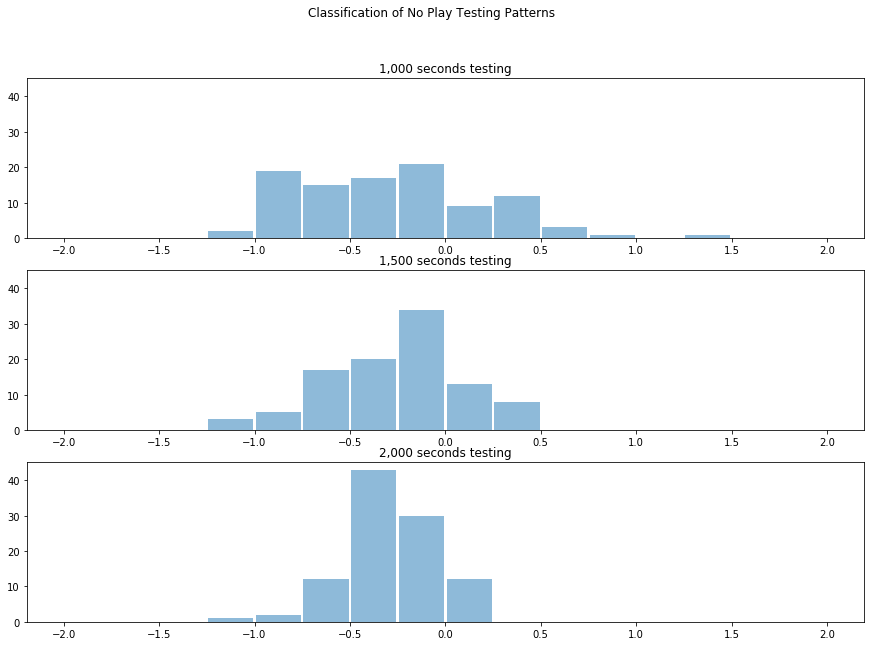

In [30]:
noplay_testing2=noplay_testing2.sort_index()
noplay_testing3=noplay_testing3.sort_index()
noplay_testing4=noplay_testing4.sort_index()

noplaytest_means2 = np.mean(noplay_testing2.values.reshape(-1, 200), axis=1) 
noplaytest_means3 = np.mean(noplay_testing3.values.reshape(-1, 200), axis=1) 
noplaytest_means4 = np.mean(noplay_testing4.values.reshape(-1, 200), axis=1) 

f, (ax1,ax2,ax3) = plt.subplots(3, 1, sharey=True, figsize=(15, 10))
f.suptitle('Classification of No Play Testing Patterns')
ax1.hist(np.hstack(noplaytest_means2), bins=bins, rwidth=0.95, alpha=0.5, label='1,000 seconds testing')
ax1.set_title('1,000 seconds testing')
ax2.hist(np.hstack(noplaytest_means3), bins=bins, rwidth=0.95, alpha=0.5, label='1,500 seconds testing')
ax2.set_title('1,500 seconds testing')
ax3.hist(np.hstack(noplaytest_means4), bins=bins, rwidth=0.95, alpha=0.5, label='2,000 seconds testing')
ax3.set_title('2,000 seconds testing')


Text(0.5,1,'2,000 seconds training')

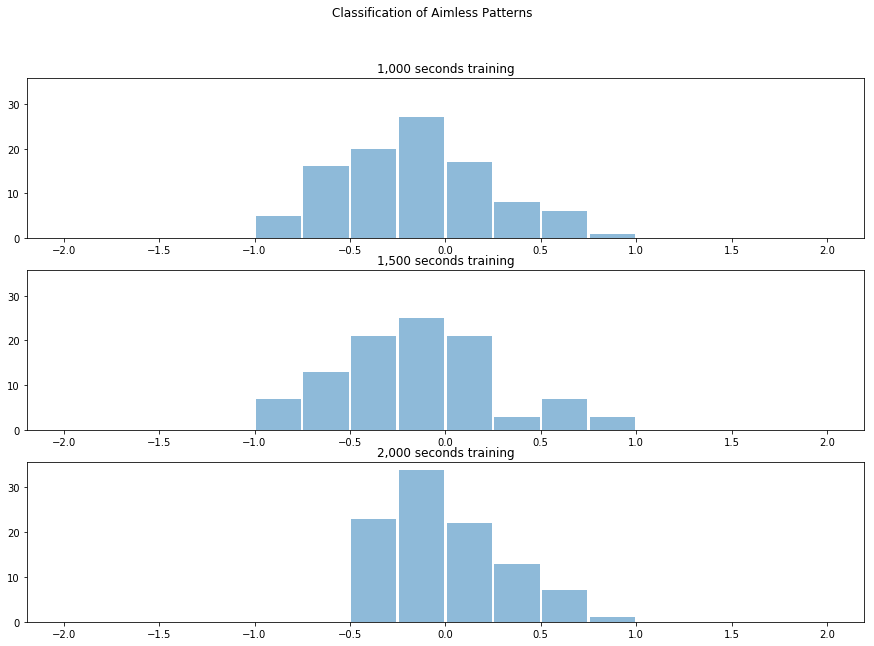

In [31]:
aimless2=aimless2.sort_index()
aimless3=aimless3.sort_index()
aimless4=aimless4.sort_index()

aimless_means2 = np.mean(aimless2.values.reshape(-1, 200), axis=1) 
aimless_means3 = np.mean(aimless3.values.reshape(-1, 200), axis=1) 
aimless_means4 = np.mean(aimless4.values.reshape(-1, 200), axis=1) 

f, (ax1,ax2,ax3) = plt.subplots(3, 1, sharey=True, figsize=(15, 10))
f.suptitle('Classification of Aimless Patterns')
ax1.hist(np.hstack(aimless_means2), bins=bins, rwidth=0.95, alpha=0.5, label='1,000 seconds training')
ax1.set_title('1,000 seconds training')
ax2.hist(np.hstack(aimless_means3), bins=bins, rwidth=0.95, alpha=0.5, label='1,500 seconds training')
ax2.set_title('1,500 seconds training')
ax3.hist(np.hstack(aimless_means4), bins=bins, rwidth=0.95, alpha=0.5, label='2,000 seconds training')
ax3.set_title('2,000 seconds training')